In [3]:
import gymnasium as gym

from stable_baselines3 import SAC, DDPG, PPO


from environment import *
from env_wrappers import *
from matplotlib import pyplot as plt
from general_utils import *
from delay_model import *
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
import torch
from wc_sac import *
from stable_baselines3.common.logger import Logger, configure
import datetime
import copy
from test_utils import *
from train_utils import *
from orchestrator import *
import pandas as pd
from safe_sac import SafeSAC

%load_ext autoreload
%autoreload 2

plt.rcParams['font.family'] = 'serif'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
core_env = Position(desired_state=np.array([0, 2.6141]))
wrapped = init_wrappers(core_env, observation_type='setpoint-error', randomise_setpoint=True)
print(f"Observation {wrapped.reset()[0]}, state {wrapped.unwrapped.state} and desired {wrapped.unwrapped.desired_state}")
tank_agent, tank_env = train_default_sac(core_env = core_env, desired_state=[0,2.6141], seed = 0, n_episodes = 200, observation_type='setpoint-error', randomise_setpoint=True)

Wrapping in random setpoint
Regions limits are [[array([-2.8, -2.8]), array([-0.93333333, -0.93333333])], [array([-0.93333333, -0.93333333]), array([0.93333333, 0.93333333])], [array([0.93333333, 0.93333333]), array([2.8, 2.8])]]
Wrapping in observe setpoint error
Rescaling action
Rescaling observation
Observation [0.         0.58045484 0.26181585 0.02832368], state [-1.57089508  1.57142243] and desired [0.         1.74136451]
Wrapping in random setpoint
Regions limits are [[array([-2.8, -2.8]), array([-0.93333333, -0.93333333])], [array([-0.93333333, -0.93333333]), array([0.93333333, 0.93333333])], [array([0.93333333, 0.93333333]), array([2.8, 2.8])]]
Wrapping in observe setpoint error
Rescaling action
Rescaling observation
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs/train/Position/setpoint-error/randomised/0615/Desired[0, 2.6141]/sac
---------------------------------
| rollout/           |          |
|    ep_len_mean  

c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\save_util.py:284: UserWarning: Path 'models\Position\setpoint-error\randomised\Desired[0, 2.6141]' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


Wrapping in observe setpoint error
Rescaling action
Rescaling observation
Initial state was [0.  1.  0.  0.5]
Bias: [ 8.87971290e-11 -4.33075517e-04]


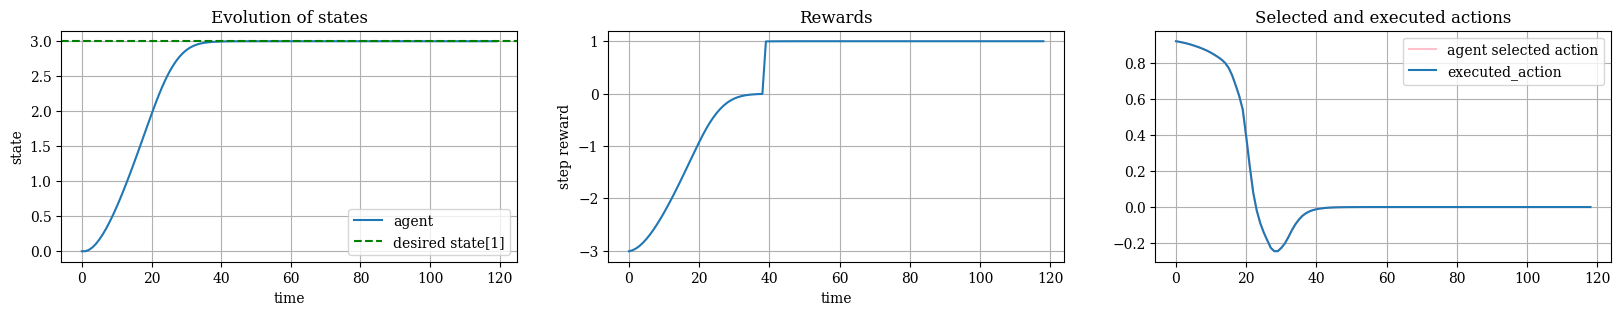

In [15]:
test_env = Position(desired_state=np.array([0, 3.0]), start_state = np.array([0.0,0.0]))
test_env = init_wrappers(test_env, observation_type='setpoint-error')
test_env = DelayAction(test_env, delay = 0)

states, actions, rewards, avg, executed = test_agent(tank_agent, test_env, deterministic=True, state_error=True)
# start = 0
# stop = 120
# plt.plot((np.array(states))[start:stop])
# plt.axhline(test_env.unwrapped.desired_state, color = 'r', linestyle = '--')
# # plt.stairs(np.array(tank_env.unwrapped.desired_trajectory)[start:stop])
# plt.legend(['State', 'Desired'])
print(f"Bias: {states[-1] - test_env.unwrapped.desired_state}")
plot_test(test_env, states, rewards, actions, executed, states_indexes = [1])